
## Coefficient of variation maps
### author: Javier Lopatin
### mail: javierlopatin@gmail.com
### Manuscript: Comparing Generalized Linear Models and random forest to model vascular plant species richness using LiDAR data in a natural forest in central Chile
### last changes: 12/11/2015
## ==============================================================

### load the require packages

In [5]:
pkgs<-c("rgdal", "raster", "MASS", "alphahull", "GISTools", "tripack")
lapply(pkgs, require, character.only=T)

Loading required package: rgdal
rgdal: version: 1.1-10, (SVN revision 622)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.0.1, released 2015/09/15
 Path to GDAL shared files: C:/Users/Lopatin/Documents/R/win-library/3.3/rgdal/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.2, 08 September 2015, [PJ_VERSION: 492]
 Path to PROJ.4 shared files: C:/Users/Lopatin/Documents/R/win-library/3.3/rgdal/proj
 Linking to sp version: 1.2-3 
Loading required package: MASS

Attaching package: 'MASS'

The following objects are masked from 'package:raster':

    area, select

Loading required package: alphahull
Warning message:
: package 'alphahull' was built under R version 3.3.1Loading required package: GISTools
Warning message:
: package 'GISTools' was built under R version 3.3.1Loading required package: maptools
Checking rgeos availability: TRUE
Loading required package: RColorBrewer
Loading required package: rgeos
rgeos version: 0.3-19, (SVN revision 524

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

In [1]:
# set working directory
setwd("C:/Users/Lopatin/Dropbox/Publicaciones/SpeciesRichness-GLMvsRF-LiDAR")

### Load data 
#### "dat" contains the observations and predictions at plot level, while "map" contains the predictors in a systematic grid of 30m x 30m
#### Both data must have the same column, names and order 


In [7]:
dat <- read.table("Richness_model.csv", header=T, sep=",", dec=".") 
map <- read.table("Maps.csv", header=T, sep=",", dec=".")

### Create the bootstrapping predicted richness in all area.
### Use the "dat" data for training and the "map" data for predict. 

In [8]:
# Bootstrapping the map
N = length(dat[,1]) # N° observations
B = 500  # N° of bootraps iterations

# Total
Pred.map<-list()
ID.map<-list()
for(i in 1:B){
  idx = sample(1:N, N, replace = T)
  train = dat[idx,] 
  ID<-map$ID
  ID.map [[i]]<-ID
  # train the model using the "dat" data
  ms <- glm(Total_richness ~  one_mean + DTM_1_mean + slope_1m_std, data=train,  family=negative.binomial(theta=1 , link="log"))
  # predict using the "map" data
  Pred<-stats:::predict(ms, newdata=map, type="response")
  Pred.map[[i]]<-Pred
}

# Tree
Pred.map.A<-list()
for(i in 1:B){
  idx = sample(1:N, N, replace = T)
  train = dat[idx,] 
  ms <- glm(A_RICH ~  one_mean + DTM_1_mean + slope_1m_std, data=train,  family=negative.binomial(theta=1 , link="log"))
  Pred<-stats:::predict(ms, newdata=map, type="response")
  Pred.map.A[[i]]<-Pred
}

# Shrub
Pred.map.AR<-list()
for(i in 1:B){
  idx = sample(1:N, N, replace = T)
  train = dat[idx,] 
  ms <- glm(AR_RICH ~  one_mean + DTM_1_mean + slope_1m_std, data=train,  family=negative.binomial(theta=1 , link="log"))
  Pred<-stats:::predict(ms, newdata=map, type="response")
  Pred.map.AR[[i]]<-Pred
}

# Herb
Pred.map.H<-list()
for(i in 1:B){
  idx = sample(1:N, N, replace = T)
  train = dat[idx,] 
  ms <- glm(Herb_richness ~  one_mean + DTM_1_mean + slope_1m_std, data=train,  family=negative.binomial(theta=1 , link="log"))
  Pred<-stats:::predict(ms, newdata=map, type="response")
  Pred.map.H[[i]]<-Pred
}

# save values
save.image("CV_map.RData")

ERROR: Error in eval(expr, envir, enclos): object 'A_RICH' not found


In [ ]:
# Store the bootstrap predictions 
write.table(ID.map,      file="ID_map.txt",      sep="\t", row.names = F)
write.table(Pred.map,    file="Pred_map.txt",    sep="\t", row.names = F)
write.table(Pred.map.A,  file="Pred_map.A.txt",  sep="\t", row.names = F)
write.table(Pred.map.AR, file="Pred_map.AR.txt", sep="\t", row.names = F)
write.table(Pred.map.H,  file="Pred_map.H.txt",  sep="\t", row.names = F)

# Manage the data
data_ID    <- read.table("ID_map.txt", header=F)
data_Total <- read.table("Pred_map.txt", header=F) 
data_Tree  <- read.table("Pred_map.A.txt", header=F)
data_Shrub <- read.table("Pred_map.AR.txt", header=F)
data_Herb  <- read.table("Pred_map.H.txt", header=F)

data_ID    <- t(data_ID)
data_Total <- t(data_Total)
data_Tree  <- t(data_Tree)
data_Shrub <- t(data_Shrub)
data_Herb  <- t(data_Herb)

# CV values
cv_Total <- list()
cv_Tree  <- list()
cv_shrub <- list()
cv_Herb  <- list()

for (i in 1:length(data_Total[1,])){
  cv1 <- cv(data_Total[,i])
  cv2 <- cv(data_Tree[,i])
  cv3 <- cv(data_Shrub[,i])
  cv4 <- cv(data_Herb[,i])
  
  cv_Total[[i]] <- cv1
  cv_Tree[[i]]  <- cv2
  cv_shrub[[i]] <- cv3
  cv_Herb[[i]]  <- cv4
}

save.image("CV_map.RData")

In [ ]:
# write the results with the map ID
cv_total_map <- data.frame(map$ID, unlist(cv_Total))
cv_tree_map  <- data.frame(map$ID, unlist(cv_Tree))
cv_shrub_map <- data.frame(map$ID, unlist(cv_shrub))
cv_herb_map  <- data.frame(map$ID, unlist(cv_Herb))

colnames(cv_total_map) <- c("ID", "CV")
colnames(cv_tree_map)  <- c("ID", "CV")
colnames(cv_shrub_map) <- c("ID", "CV")
colnames(cv_herb_map)  <- c("ID", "CV")

In [ ]:
# load shapefile 
polyg<-readOGR(".","Grid_30m_c")

# import cv values into the shapefile
poly_total <- merge(polyg, cv_total_map, by.x="ID", by.y="ID")
poly_tree  <- merge(polyg, cv_tree_map, by.x="ID", by.y="ID")
poly_shrub <- merge(polyg, cv_shrub_map, by.x="ID", by.y="ID")
poly_herb  <- merge(polyg, cv_herb_map, by.x="ID", by.y="ID")

# rasterize and print
r <- raster(extent(poly_total))
res(r)=30
poly_total <- rasterize(poly_total, field="CV", r)

r <- raster(extent(poly_tree))
res(r)=30
poly_tree <- rasterize(poly_tree, field="CV", r)

r <- raster(extent(poly_shrub))
res(r)=30
poly_shrub <- rasterize(poly_shrub, field="CV", r)

r <- raster(extent(poly_herb))
res(r)=30
poly_herb <- rasterize(poly_herb, field="CV", r)

In [ ]:
# Convert the predictors to raster format
Pred_ras<- merge(polyg, map, by.x="ID", by.y="ID")
r <- raster(extent(Pred_ras))
res(r)=30
Mean_DTM <- rasterize(Pred_ras, field="DTM_1_mean", r)
Mean_DCM <- rasterize(Pred_ras, field="one_mean", r)
STD_Slope <- rasterize(Pred_ras, field="slope_1m_std", r)

# Stack the predictors
predictors<-stack(Mean_DTM, Mean_DCM, STD_Slope)  
names(predictors) <- c("DTM_1_mean", "one_mean", "slope_1m_std") # Use the same names than in the data
plot(predictors)

In [10]:
# Apply the convexhull mask
tr.dat <- list(x=dat$one_mean, y=dat$DTM_1_mean)  # two dimensions
# MASK!, Remove or change the -2 factors in tr.dat$x and tr.dat$y to manage the mask area
tri<-tri.mesh(tr.dat$x - 2, tr.dat$y - 2, duplicate="remove") 
a <- !is.na(predictors[["one_mean"]][])
# Apply to the Total layer
poly_total[a][!in.convex.hull(tri, x=predictors[["one_mean"]][a], y=predictors[["DTM_1_mean"]][a])] <- NA

# Apply to the other layers
poly_tree  <- mask(poly_tree, poly_total)
poly_shrub <- mask(poly_shrub, poly_total)
poly_herb  <- mask(poly_herb, poly_total)

### Plot the CV maps. Figure 6 

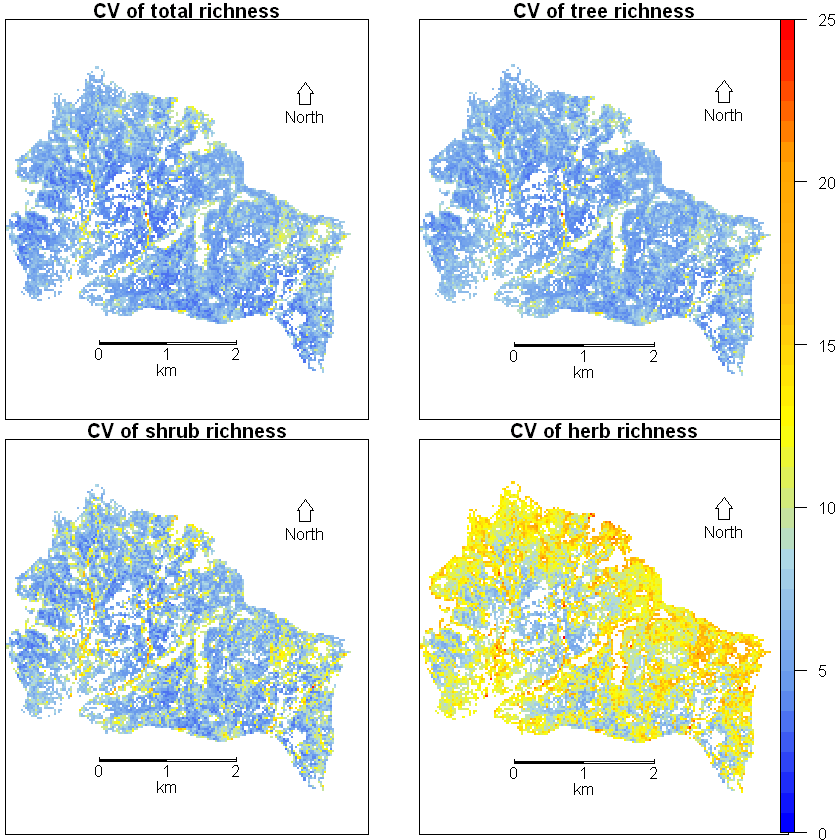

In [11]:
#pdf(file = "Figures/fig 6 B&W.pdf", width=8, height=8)
# color version
color <- colorRampPalette(c("blue", "cornflowerblue", "lightblue", "yellow", "darkgoldenrod1", "orange", "red"))
# B&W version
#color <- colorRampPalette(c("gray100", "gray50", "gray10"))

par(mfrow=c(2,2), mai = c(0, 0, 0, 0))
# Total
par(mar=c(0, 0.3, 1, 0))
plot(poly_total, main="CV of total richness", col=color(40), zlim=c(0,25), axes=F, legend=F)
north.arrow(xb=326500,yb=6113800,len=80,lab="North")
map.scale(xc=324500,yc=6110300,len=2000,units="km", ndivs=2, scol = "black", sfcol =c("black", "white"))
# Tree
par(mar=c(0, 0, 1, 0))
plot(poly_tree, main="CV of tree richness", col=color(40), zlim=c(0,25),axes=F, legend=F)
north.arrow(xb=326500,yb=6113800,len=80,lab="North")
map.scale(xc=324500,yc=6110300,len=2000,units="km", ndivs=2, scol = "black", sfcol =c("black", "white"))
# Shrub
par(mar=c(0.3, 0.3, 1, 0))
plot(poly_shrub,  main="CV of shrub richness", col=color(40), zlim=c(0,25),axes=F, legend=F)
north.arrow(xb=326500,yb=6113800,len=80,lab="North")
map.scale(xc=324500,yc=6110300,len=2000,units="km", ndivs=2, scol = "black", sfcol =c("black", "white"))
box()
# Herb
par(mar=c(0.3, 0, 1, 0))
plot(poly_herb, main="CV of herb richness",  col=color(40), zlim=c(0,25), axes=F, legend=F)
north.arrow(xb=326500,yb=6113800,len=80,lab="North")
map.scale(xc=324500,yc=6110300,len=2000,units="km", ndivs=2, scol = "black", sfcol =c("black", "white"))
box()
# add bar of values
par(mfrow=c(1, 1), mar=c(0.3, 0, 0.8, 0), fig=c(0.5,1,0,1), new=F)
plot(poly_herb, legend.only=TRUE, col=color(40), legend.shrink=1, legend.width=1.5, zlim=c(0, 25),
     axis.args=list(at=seq(0, 25, 5), labels=seq(0, 25, 5), cex.axis=0.8))
#dev.off()

#save.image("CV_map.RData")

In [ ]:
# save the data
save.image("CV_map.RData")